In [6]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [7]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape) 
print(x_test.shape) 

(60000, 784)
(10000, 784)


In [8]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)


In [9]:

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [10]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [11]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [12]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [13]:
# del autoencoder

In [14]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.3477 - val_loss: 0.2702
Epoch 2/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.2627 - val_loss: 0.2515
Epoch 3/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.2412 - val_loss: 0.2287
Epoch 4/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.2203 - val_loss: 0.2103
Epoch 5/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.2051 - val_loss: 0.1975
Epoch 6/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.1940 - val_loss: 0.1878
Epoch 7/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.1856 - val_loss: 0.1805
Epoch 8/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.1789 - val_loss: 0.1745
Epoch 9/10
60000/60000 [==============================] - 2s 4

In [15]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

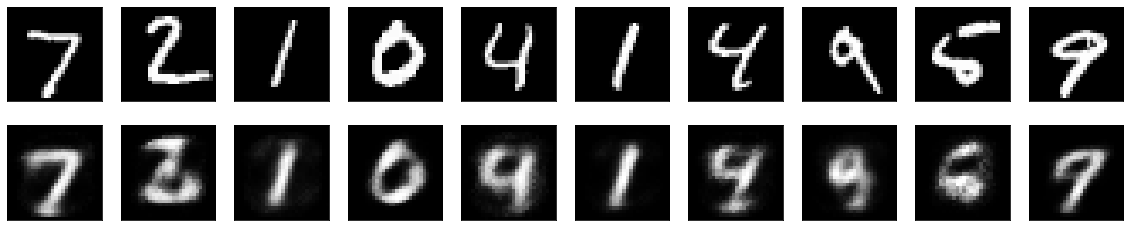

In [17]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Deep AutoEncoder

In [18]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(32, activation='relu')(encoded)


decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [19]:
autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)
encoded_input = Input(shape=(32,))
decoder_layer1 = autoencoder.layers[-2]
decoder_layer2 = autoencoder.layers[-1]


In [57]:
decoder = Model(encoded_input,  ( (decoder_layer2(decoder_layer1(encoded_input))) ) )

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s - loss: 0.3470 - val_loss: 0.2658
Epoch 2/10
60000/60000 [==============================] - 6s - loss: 0.2593 - val_loss: 0.2481
Epoch 3/10
60000/60000 [==============================] - 8s - loss: 0.2347 - val_loss: 0.2205
Epoch 4/10
60000/60000 [==============================] - 8s - loss: 0.2106 - val_loss: 0.1976
Epoch 5/10
60000/60000 [==============================] - 11s - loss: 0.1906 - val_loss: 0.1826
Epoch 6/10
60000/60000 [==============================] - 10s - loss: 0.1795 - val_loss: 0.1737
Epoch 7/10
60000/60000 [==============================] - 10s - loss: 0.1718 - val_loss: 0.1664
Epoch 8/10
60000/60000 [==============================] - 9s - loss: 0.1649 - val_loss: 0.1600
Epoch 9/10
60000/60000 [==============================] - 11s - loss: 0.1596 - val_loss: 0.1563
Epoch 10/10
60000/60000 [==============================] - 8s - loss: 0.1553 - val_loss: 0.

In [58]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

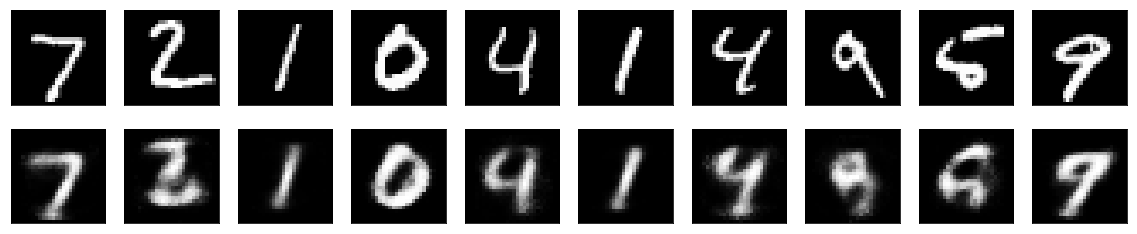

In [59]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()